IMPORT LIBRARY

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

READ DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

# download dataset from https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset

Saving Disease Recognition.csv to Disease Recognition.csv


## Data Exploration

In [ ]:
data = pd.read_csv('Disease Recognition.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## charactieristics of data

data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
data.shape

(4920, 18)

In [ ]:
## check null values

null_checker = data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


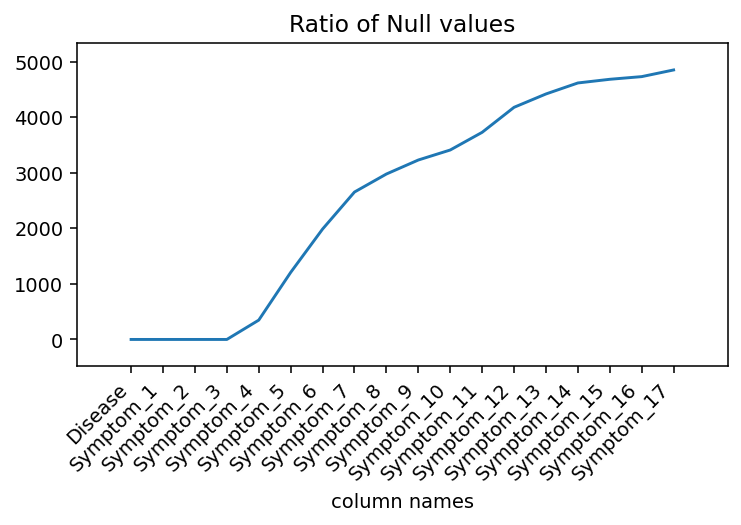

In [ ]:
## plot of null value

plt.figure(figsize=(6, 3), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
disease_counts = data['Disease'].value_counts()
disease_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

## Preprocess

In [ ]:
## fill nan values
data = data.fillna(0)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
symp = data.drop('Disease', axis=1)
symp = symp.columns.to_numpy()
print(symp)

['Symptom_1' 'Symptom_2' 'Symptom_3' 'Symptom_4' 'Symptom_5' 'Symptom_6'
 'Symptom_7' 'Symptom_8' 'Symptom_9' 'Symptom_10' 'Symptom_11'
 'Symptom_12' 'Symptom_13' 'Symptom_14' 'Symptom_15' 'Symptom_16'
 'Symptom_17']


In [ ]:
all_symp = set()

for col in symp:
    unique_symp = data[col].unique()
    all_symp.update(unique_symp)

# Displays a list of symptoms that appear in the dataset
print("Gejala yang muncul dalam dataset:")
print(all_symp)

Gejala yang muncul dalam dataset:
{0, ' patches_in_throat', ' mood_swings', ' continuous_feel_of_urine', ' swollen_extremeties', ' neck_pain', ' shivering', ' muscle_pain', ' obesity', ' chills', ' movement_stiffness', ' belly_pain', ' muscle_wasting', ' unsteadiness', ' hip_joint_pain', ' swelled_lymph_nodes', ' ulcers_on_tongue', ' excessive_hunger', ' sunken_eyes', ' abdominal_pain', ' passage_of_gases', ' receiving_blood_transfusion', ' sweating', ' prominent_veins_on_calf', ' back_pain', ' vomiting', ' mucoid_sputum', ' joint_pain', ' stomach_bleeding', ' bladder_discomfort', ' enlarged_thyroid', ' restlessness', ' dizziness', ' spotting_ urination', ' dark_urine', ' weakness_of_one_body_side', ' nodal_skin_eruptions', ' bruising', ' congestion', ' cough', ' fluid_overload', ' high_fever', ' slurred_speech', ' drying_and_tingling_lips', ' increased_appetite', ' silver_like_dusting', ' depression', ' fast_heart_rate', ' phlegm', ' weight_gain', ' pus_filled_pimples', 'itching', ' y

In [ ]:
all_symp = list(all_symp)
print(all_symp)

[0, ' patches_in_throat', ' mood_swings', ' continuous_feel_of_urine', ' swollen_extremeties', ' neck_pain', ' shivering', ' muscle_pain', ' obesity', ' chills', ' movement_stiffness', ' belly_pain', ' muscle_wasting', ' unsteadiness', ' hip_joint_pain', ' swelled_lymph_nodes', ' ulcers_on_tongue', ' excessive_hunger', ' sunken_eyes', ' abdominal_pain', ' passage_of_gases', ' receiving_blood_transfusion', ' sweating', ' prominent_veins_on_calf', ' back_pain', ' vomiting', ' mucoid_sputum', ' joint_pain', ' stomach_bleeding', ' bladder_discomfort', ' enlarged_thyroid', ' restlessness', ' dizziness', ' spotting_ urination', ' dark_urine', ' weakness_of_one_body_side', ' nodal_skin_eruptions', ' bruising', ' congestion', ' cough', ' fluid_overload', ' high_fever', ' slurred_speech', ' drying_and_tingling_lips', ' increased_appetite', ' silver_like_dusting', ' depression', ' fast_heart_rate', ' phlegm', ' weight_gain', ' pus_filled_pimples', 'itching', ' yellowing_of_eyes', ' breathlessnes

In [ ]:
# Changing the dataset with reference to existing symptoms
for symps in all_symp:
    data[symps] = data.apply(lambda row: 1 if symps in row.values else 0, axis=1)

print(data.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches         0         0         0         0         0   
1                     0         0         0         0         0         0   
2                     0         0         0         0         0         0   
3                     0         0         0         0         0         0   
4                     0         0         0         0         0         0   

   ...  malaise  coma  abnormal_menstruation  bloo

In [ ]:
import numpy as np
del_col = np.append(symp,0)
data = data.drop(del_col, axis=1)
print(data.head())

            Disease   patches_in_throat   mood_swings  \
0  Fungal infection                   0             0   
1  Fungal infection                   0             0   
2  Fungal infection                   0             0   
3  Fungal infection                   0             0   
4  Fungal infection                   0             0   

    continuous_feel_of_urine   swollen_extremeties   neck_pain   shivering  \
0                          0                     0           0           0   
1                          0                     0           0           0   
2                          0                     0           0           0   
3                          0                     0           0           0   
4                          0                     0           0           0   

    muscle_pain   obesity   chills  ...   malaise   coma  \
0             0         0        0  ...         0      0   
1             0         0        0  ...         0      0   
2       

In [ ]:
#check
data.iloc[332]

Disease                      Hypoglycemia
 patches_in_throat                      0
 mood_swings                            0
 continuous_feel_of_urine               0
 swollen_extremeties                    0
                                 ...     
 continuous_sneezing                    0
 stomach_pain                           0
 lack_of_concentration                  0
 altered_sensorium                      0
 irritability                           1
Name: 332, Length: 132, dtype: object

In [ ]:
preprocess = pd.DataFrame(data)
preprocess

,Disease,patches_in_throat,mood_swings,continuous_feel_of_urine,swollen_extremeties,neck_pain,shivering,muscle_pain,obesity,chills,...,malaise,coma,abnormal_menstruation,blood_in_sputum,muscle_weakness,continuous_sneezing,stomach_pain,lack_of_concentration,altered_sensorium,irritability
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(preprocess.columns)

,0
0,Disease
1,patches_in_throat
2,mood_swings
3,continuous_feel_of_urine
4,swollen_extremeties
...,...
127,continuous_sneezing
128,stomach_pain
129,lack_of_concentration
130,altered_sensorium


In [ ]:
# Encode disease
one_hot_encoded_data = pd.get_dummies(preprocess, columns = ['Disease'])
one_hot_encoded_data

,patches_in_throat,mood_swings,continuous_feel_of_urine,swollen_extremeties,neck_pain,shivering,muscle_pain,obesity,chills,movement_stiffness,...,Disease_Osteoarthristis,Disease_Paralysis (brain hemorrhage),Disease_Peptic ulcer diseae,Disease_Pneumonia,Disease_Psoriasis,Disease_Tuberculosis,Disease_Typhoid,Disease_Urinary tract infection,Disease_Varicose veins,Disease_hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Data Exploration (after transformation)

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 172 entries,  patches_in_throat to Disease_hepatitis A
dtypes: int64(131), uint8(41)
memory usage: 5.1 MB


In [ ]:
pd.DataFrame(one_hot_encoded_data.columns)

,0
0,patches_in_throat
1,mood_swings
2,continuous_feel_of_urine
3,swollen_extremeties
4,neck_pain
...,...
167,Disease_Tuberculosis
168,Disease_Typhoid
169,Disease_Urinary tract infection
170,Disease_Varicose veins


In [ ]:
symptomps = one_hot_encoded_data.drop(one_hot_encoded_data.iloc[:, 131:172],axis = 1)
symptomps

,patches_in_throat,mood_swings,continuous_feel_of_urine,swollen_extremeties,neck_pain,shivering,muscle_pain,obesity,chills,movement_stiffness,...,malaise,coma,abnormal_menstruation,blood_in_sputum,muscle_weakness,continuous_sneezing,stomach_pain,lack_of_concentration,altered_sensorium,irritability
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for column in symptomps:
    count = preprocess[column].sum()
    print(f"{column}:\n",count)
    print()

 patches_in_throat:
 108

 mood_swings:
 228

 continuous_feel_of_urine:
 114

 swollen_extremeties:
 120

 neck_pain:
 228

 shivering:
 108

 muscle_pain:
 474

 obesity:
 228

 chills:
 798

 movement_stiffness:
 114

 belly_pain:
 114

 muscle_wasting:
 108

 unsteadiness:
 114

 hip_joint_pain:
 114

 swelled_lymph_nodes:
 348

 ulcers_on_tongue:
 108

 excessive_hunger:
 462

 sunken_eyes:
 108

 abdominal_pain:
 1032

 passage_of_gases:
 114

 receiving_blood_transfusion:
 120

 sweating:
 678

 prominent_veins_on_calf:
 114

 back_pain:
 228

 vomiting:
 1914

 mucoid_sputum:
 114

 joint_pain:
 684

 stomach_bleeding:
 120

 bladder_discomfort:
 114

 enlarged_thyroid:
 120

 restlessness:
 228

 dizziness:
 336

 spotting_ urination:
 108

 dark_urine:
 570

 weakness_of_one_body_side:
 108

 nodal_skin_eruptions:
 108

 bruising:
 114

 congestion:
 120

 cough:
 564

 fluid_overload:
 114

 high_fever:
 1362

 slurred_speech:
 120

 drying_and_tingling_lips:
 114

 increase